# Final Project

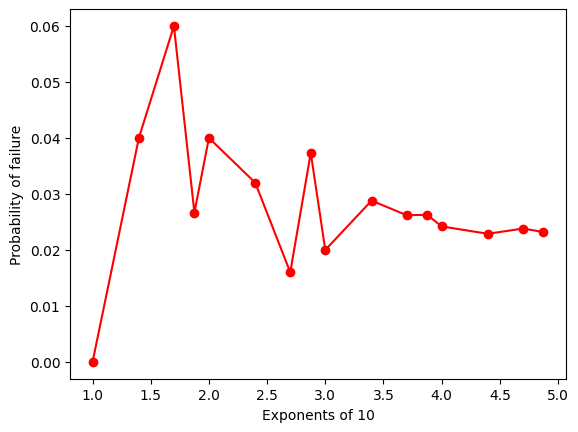

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Random vars parameters

# P_o: mean 13MPa and sd: 1MPa
P_o_mean = 13
P_o_sd = 1
# sigma_y: 235MPa and sd: 10
sigma_y_mean = 235
sigma_y_sd = 10
# sigma_u: 375MPa and sd: 12
sigma_u_mean = 375
sigma_u_sd = 12
# D_o: 1000mm and 0.5mm
D_o_mean = 1000
D_o_sd = 0.5
# D_i: 960mm and 0.5mm 
D_i_mean = 960
D_i_sd = 0.5

# Seed for consistency
np.random.seed(1)

# Generate random vars
def P_o():
    return np.random.normal(loc = P_o_mean, scale = P_o_sd)
def sigma_y():
    return np.random.normal(loc = sigma_y_mean, scale = sigma_y_sd)
def sigma_u():
    return np.random.normal(loc = sigma_u_mean, scale = sigma_u_sd)
def D_o():
    return np.random.normal(loc = D_o_mean, scale = D_o_sd)
def D_i():
    return np.random.normal(loc = D_i_mean, scale = D_i_sd)
def r(sigma_u, sigma_y):
    return 0.224 * ((sigma_u / sigma_y) - 1) ** 0.604

# Pressure random vars
def faupel_37(sigma_y, sigma_u, D_o, D_i):
    P_b = 2 / (3 ** 0.5)
    P_b *= sigma_y
    P_b *= (2 - (sigma_y / sigma_u))
    P_b *= np.log(D_o/D_i)
    return P_b

def svensson_38(sigma_u, sigma_y, n, D_o, D_i):

    P_b = sigma_u * (0.25 / (n + 0.227))
    P_b *= 0

    pass

# Simulate 1000

n_s = [(10 ** i, (10 ** i) * 2.5, (10 ** i) * 5, (10 ** i) * 7.5) for i in range(5)]
res = [item for t in n_s for item in t][4:]
n_s = list(map(lambda x: int(x), res))
probs = np.array([])

for n in n_s:
    # Generate faupel_37 and P_o
    faupel_37_simulated = np.array([])
    for i in range(n):
        faupel_37_simulated = np.append(faupel_37_simulated, faupel_37(sigma_y(), sigma_u(), D_o(), D_i()))
    P_o_simulated = np.random.normal(13, 1, size = (n, 1))

    # Compare them
    smaller_than_P_o = faupel_37_simulated < np.squeeze(P_o_simulated)
    
    # Calculate probabilities
    probs = np.append(probs, np.count_nonzero(smaller_than_P_o) / n)

# Hola puños

# Log change of base
_ = plt.plot(np.log(np.array(n_s)) / np.log(10), probs, '-or')
_ = plt.xlabel('Exponents of 10')
_ = plt.ylabel('Probability of failure')
